<a href="https://colab.research.google.com/github/Colsai/covid_trends_mapping/blob/main/cleaned_covid_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USA Coronavirus- A Basic ML Model to Estimate Cases and Deaths
- Focus on USA/MD/VA
- NYT Datasets Used

In [ ]:
#Need to install the TFANN model for this to work
!pip install TFANN

In [ ]:
#Data taken from NYT Github

#Datetime for Time Series
import datetime

#Import Packages for Data
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from TFANN import ANNR
from google.colab import files

sns.set(style="ticks")
plt.style.use('seaborn-white')


In [ ]:
#Cases by day from beginning (US)

#USA Data will be the dataframe for national data
usa_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
us_df = pd.read_csv(usa_url)

In [ ]:
#Let's look at the head of us df first
us_df.head(5)

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


## Let's look at US DF First
We will look to build a simple predictive model here

In [ ]:
#This function just appends to each data frame the number of days, so we don't have issues later with time data
days_after = []
for i in range(1,len(us_df['date'].to_list()) + 1):
    days_after.append(i)

us_df.insert(1,"days_since_start", days_after)

In [ ]:
#What are the data types in here?
us_df.dtypes

date                object
days_since_start     int64
cases                int64
deaths               int64
dtype: object

In [ ]:
#What are the data types?
us_df['deaths'].dtypes

dtype('int64')

In [ ]:
#This is a simple function that returns items based on their change over time. 
def total_change(input_list, rounded_val=2):
    total_list = []
    day_change = 0
    
    for day in input_list:
        try:
              day_change = day - day_before
        except:
              day_before = 0

        total_list.append(day_change)
        day_before = day
    return total_list

In [ ]:
#This is a simple function that returns items based on their change over time. 
def percent_change(input_list, rounded_val=2):
    percent_list = []

    for this_year in input_list:
        try:
              pct_increase = ((this_year - last_year) / last_year) * 100
        except:
              pct_increase = 0

        percent_list.append(round(pct_increase,2))
        last_year = this_year

    percent_list = [round(i, rounded_val) for i in percent_list] #This function combines rounding inside of it, since percents are easier to use

    return percent_list

In [ ]:
#Run the Percent Change Functions
cases_new = total_change(us_df['cases'].to_list())
deaths_new = total_change(us_df['deaths'].to_list())

In [ ]:
us_df.insert(3, "cases_increase", cases_new)
us_df.insert(5, "deaths_increase", deaths_new)

In [ ]:
#Run the Percent Change Functions
cases_pct = percent_change(us_df['cases'].to_list())
deaths_pct = percent_change(us_df['deaths'].to_list())

In [ ]:
#Insert the Two Into the USA df
us_df.insert(4, "cases_pct_inc", cases_pct)
us_df.insert(7, "deaths_pct_inc", deaths_pct)

In [ ]:
us_df.head()

,date,days_since_start,cases,cases_increase,cases_pct_inc,deaths,deaths_increase,deaths_pct_inc
0,2020-01-21,1,1,0,0.0,0,0,0.0
1,2020-01-22,2,1,0,0.0,0,0,0.0
2,2020-01-23,3,1,0,0.0,0,0,0.0
3,2020-01-24,4,2,1,100.0,0,0,0.0
4,2020-01-25,5,3,1,50.0,0,0,0.0


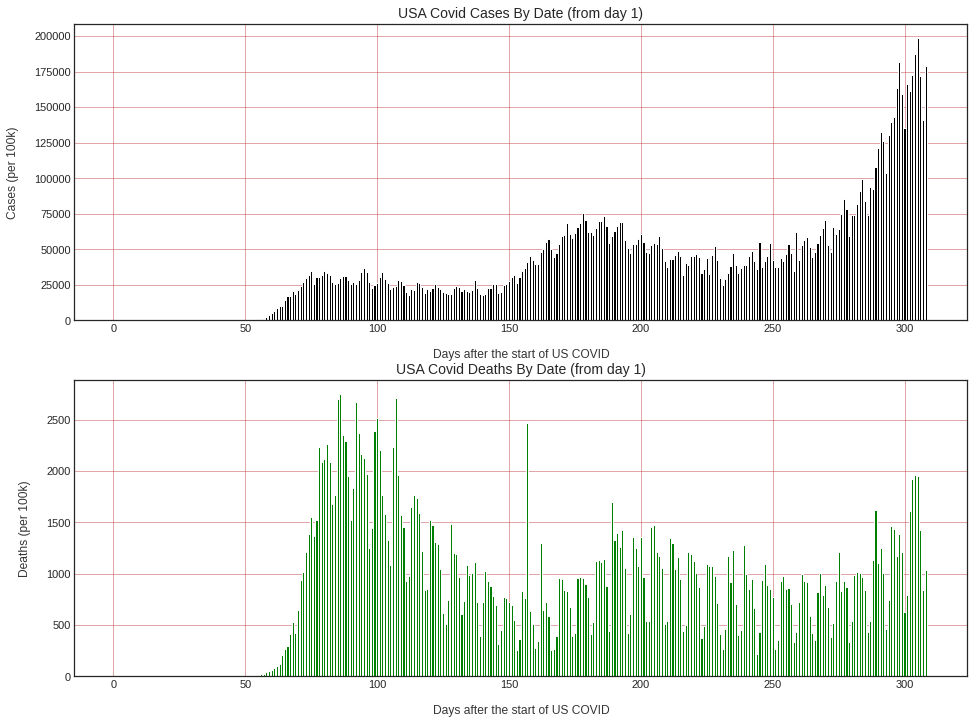

In [ ]:
#EDA Basic Plotting for Cases by Date
date = us_df['days_since_start']
cases_inc = us_df['cases_increase']
deaths_inc = us_df['deaths_increase']

fig, ax = plt.subplots(2, figsize = (16,12))

ax[0].bar(date, cases_inc, color = 'black')
ax[1].bar(date, deaths_inc, color = 'green')

labels = ['Cases','Deaths']

for i in (range(0,2)):
    ax[i].set_title(f"USA Covid {labels[i]} By Date (from day 1)", fontsize = 14)
    ax[i].grid(which = 'both', color='r', linestyle='-', linewidth=.5)
    ax[i].set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=12, color="#333533");
    ax[i].set_ylabel(f"{labels[i]} (per 100k)", labelpad=15, fontsize=12, color="#333533");

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



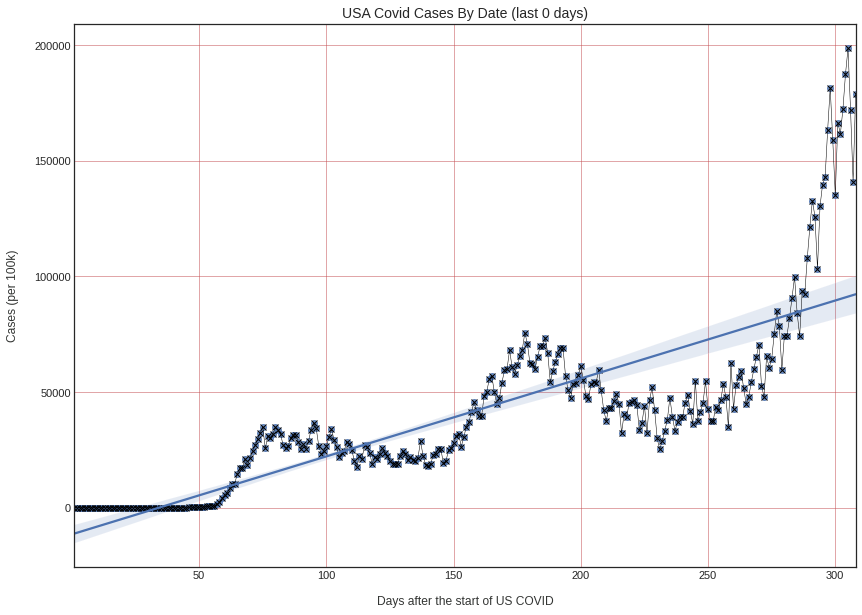

In [ ]:
#EDA Basic Plotting for Cases by Date
n=0

date = us_df['days_since_start'][-n:]
cases_inc = us_df['cases_increase'][-n:]
deaths_inc = us_df['deaths_increase'][-n:]

fig, ax = plt.subplots(figsize = (14,10))

ax.plot(date, cases_inc, '-x', color = 'black', linewidth = .5)
sns.regplot(date,cases_inc)

labels = ['Cases','Deaths']

ax.set_title(f"USA Covid {labels[i]} By Date (last {n} days)", fontsize = 14)
ax.grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax.set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=12, color="#333533");
ax.set_ylabel(f"{labels[i]} (per 100k)", labelpad=15, fontsize=12, color="#333533");

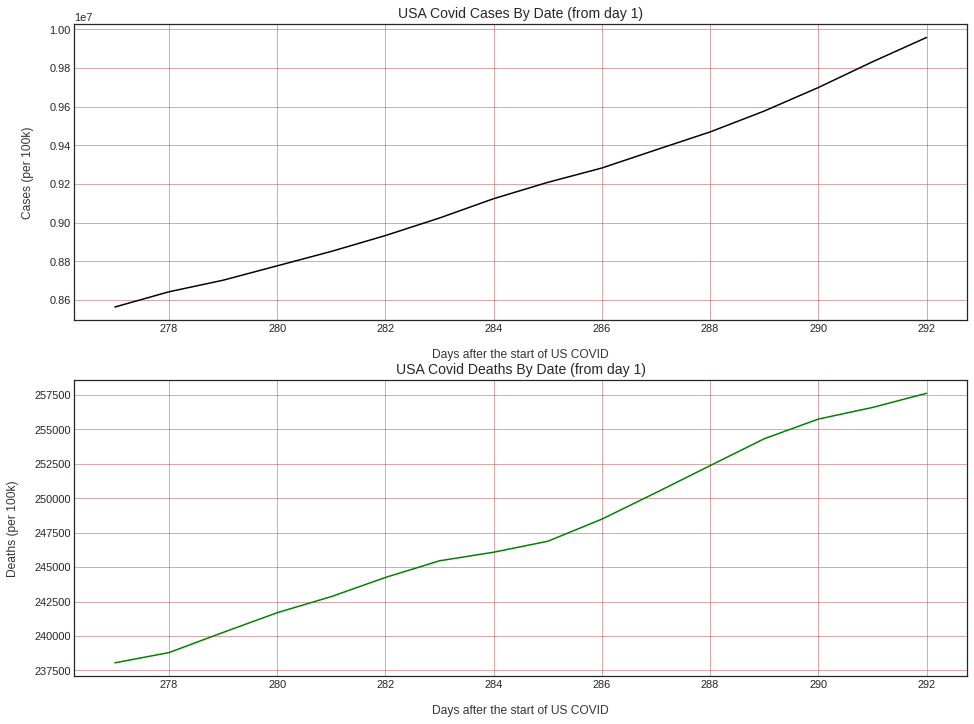

In [229]:
#EDA Basic Plotting for Cases by Date
date = us_df['days_since_start'][-32:-16]
cases = us_df['cases'][-32:-16]
deaths = us_df['deaths'][-16:]

fig, ax = plt.subplots(2, figsize = (16,12))

ax[0].plot(date, cases, color = 'black')
ax[1].plot(date, deaths, color = 'green')

labels = ['Cases','Deaths']

for i in (range(0,2)):
    ax[i].set_title(f"USA Covid {labels[i]} By Date (from day 1)", fontsize = 14)
    ax[i].grid(which = 'both', color='r', linestyle='-', linewidth=.5)
    ax[i].set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=12, color="#333533");
    ax[i].set_ylabel(f"{labels[i]} (per 100k)", labelpad=15, fontsize=12, color="#333533");

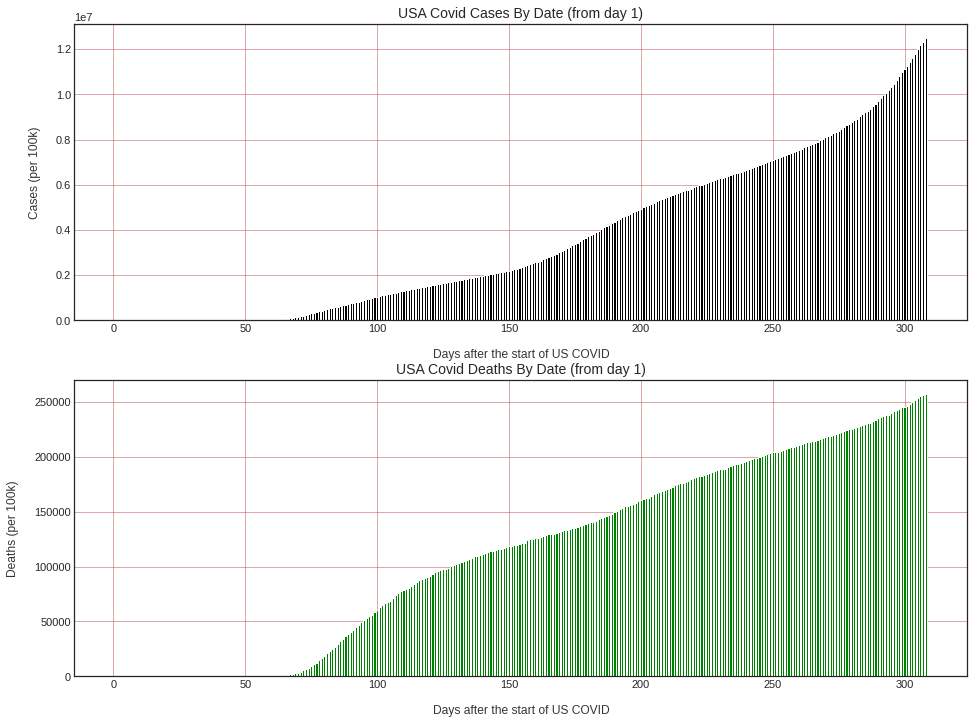

In [ ]:
#EDA Basic Plotting for Cases by Date
date = us_df['days_since_start']
cases = us_df['cases']
deaths = us_df['deaths']

fig, ax = plt.subplots(2, figsize = (16,12))

ax[0].bar(date, cases, color = 'black')
ax[1].bar(date, deaths, color = 'green')

labels = ['Cases','Deaths']

for i in (range(0,2)):
    ax[i].set_title(f"USA Covid {labels[i]} By Date (from day 1)", fontsize = 14)
    ax[i].grid(which = 'both', color='r', linestyle='-', linewidth=.5)
    ax[i].set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=12, color="#333533");
    ax[i].set_ylabel(f"{labels[i]} (per 100k)", labelpad=15, fontsize=12, color="#333533");

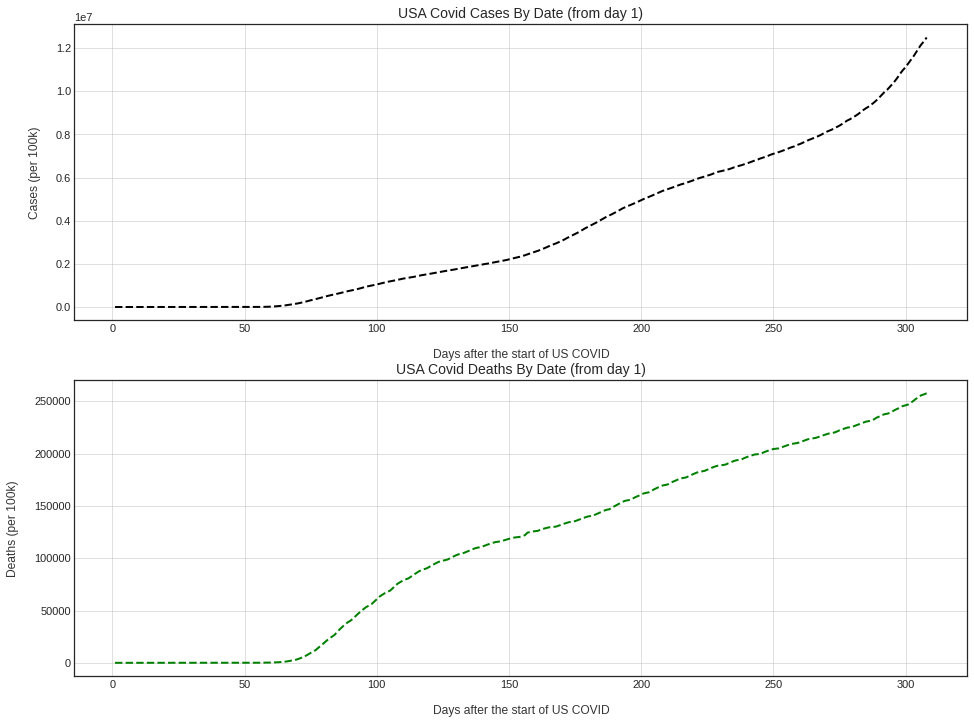

In [ ]:
#EDA Basic Plotting for Cases by Date
date = us_df['days_since_start']
cases = us_df['cases']
deaths = us_df['deaths']

fig, ax = plt.subplots(2, figsize = (16,12))

ax[0].plot(date, cases, '--', color = 'black', linewidth = 2)
ax[1].plot(date, deaths, '--', color = 'green', linewidth = 2)

labels = ['Cases','Deaths']

for i in (range(0,2)):
    ax[i].set_title(f"USA Covid {labels[i]} By Date (from day 1)", fontsize = 14)
    ax[i].grid(which = 'both', color='silver', linestyle='-', linewidth=.5)
    ax[i].set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=12, color="#333533");
    ax[i].set_ylabel(f"{labels[i]} (per 100k)", labelpad=15, fontsize=12, color="#333533");

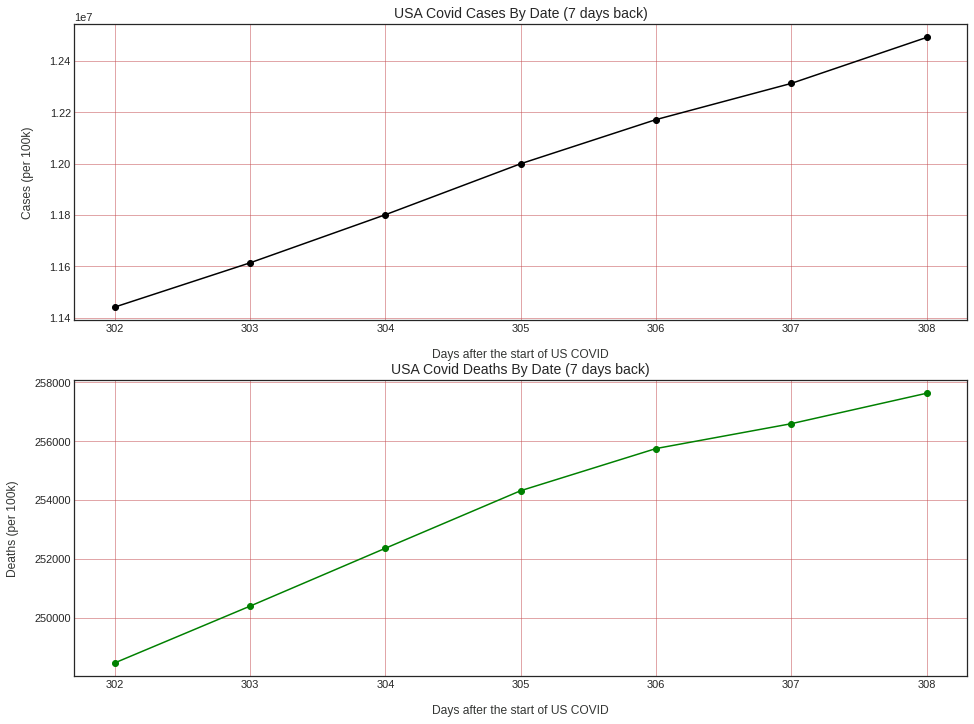

In [ ]:
#How many days back?
n=-7

date = us_df['days_since_start'][n:]
cases = us_df['cases'][n:]
deaths = us_df['deaths'][n:]

fig, ax = plt.subplots(2, figsize = (16,12))

ax[0].plot(date, cases, '-o', color = 'black')
ax[1].plot(date, deaths, '-o', color = 'green')

labels = ['Cases','Deaths']

for i in (range(0,2)):
    ax[i].set_title(f"USA Covid {labels[i]} By Date ({abs(n)} days back)", fontsize = 14)
    ax[i].grid(which = 'both', color='r', linestyle='-', linewidth=.5)
    ax[i].set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=12, color="#333533");
    ax[i].set_ylabel(f"{labels[i]} (per 100k)", labelpad=15, fontsize=12, color="#333533");

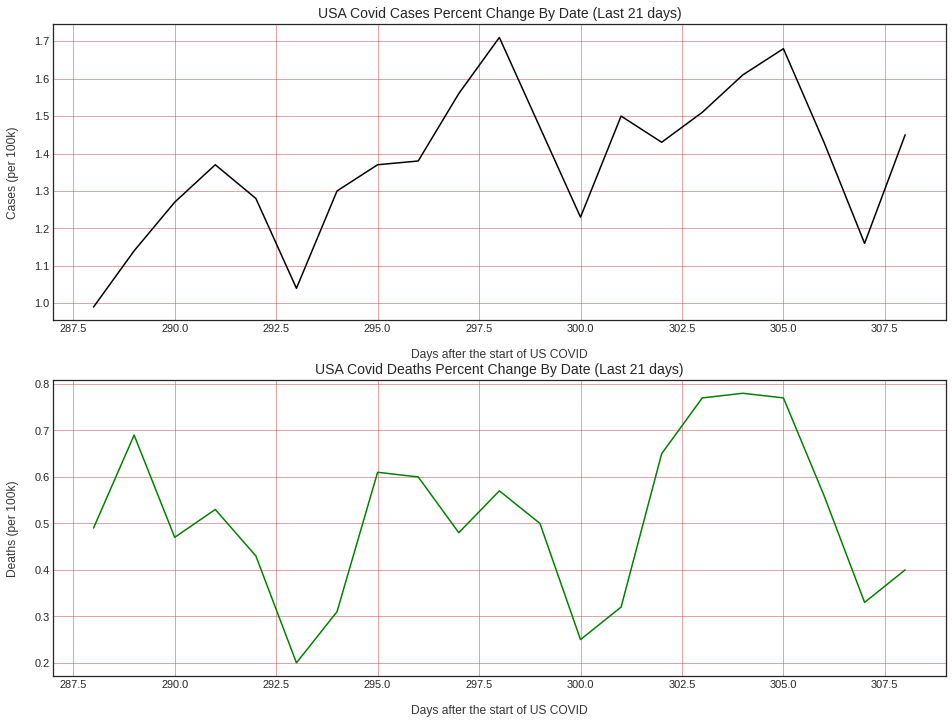

In [224]:
#EDA Basic Plotting for Cases by Date

n=-21 #How many days back?

date = us_df['days_since_start'][n:]
pct_chg_cases = us_df['cases_pct_inc'][n:]
pct_chg_deaths = us_df['deaths_pct_inc'][n:]

fig, ax = plt.subplots(2, figsize = (16,12))

ax[0].plot(date, pct_chg_cases, color = 'black')
ax[1].plot(date, pct_chg_deaths, color = 'green')

labels = ['Cases','Deaths']

for i in (range(0,2)):
    ax[i].set_title(f"USA Covid {labels[i]} Percent Change By Date (Last {abs(n)} days)", fontsize = 14)
    ax[i].grid(which = 'both', color='r', linestyle='-', linewidth=.5)
    ax[i].set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=12, color="#333533");
    ax[i].set_ylabel(f"{labels[i]} (per 100k)", labelpad=15, fontsize=12, color="#333533");

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



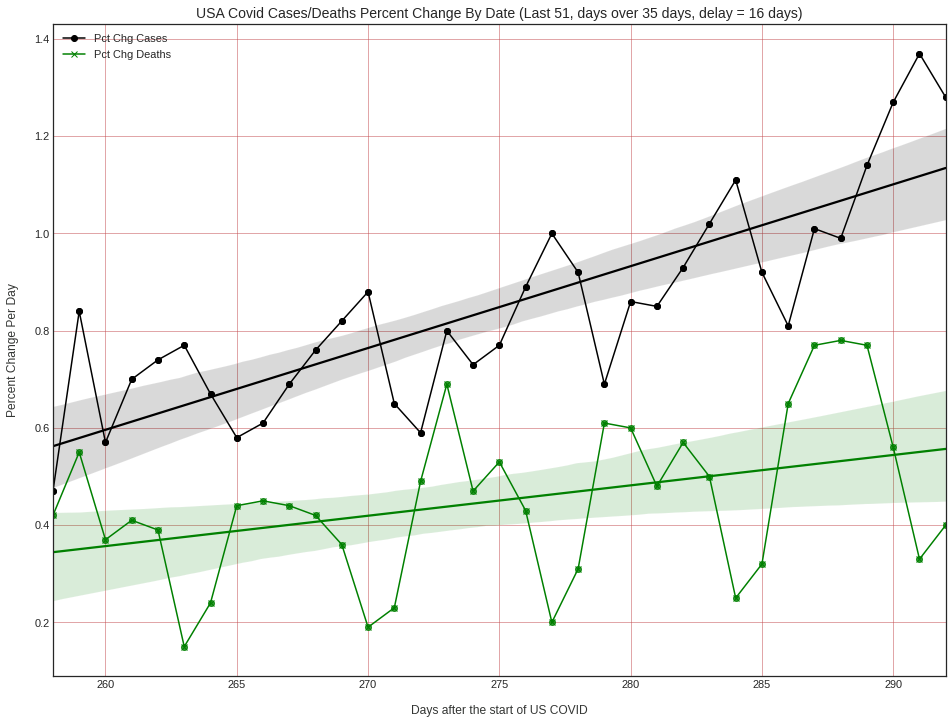

In [251]:
#EDA Basic Plotting for Cases by Date
n=-21 #How many days back?
start=-51
end=-16
delay = 16

date = us_df['days_since_start'][start:end]
pct_chg_cases = us_df['cases_pct_inc'][start:end]
pct_chg_deaths = us_df['deaths_pct_inc'][(start+delay):]

fig, ax = plt.subplots(figsize = (16,12))

ax.plot(date, pct_chg_cases, '-o', color = 'black', label = "Pct Chg Cases")
sns.regplot(date, pct_chg_cases, '--', color = 'black')
ax.plot(date, pct_chg_deaths, '-x', color = 'green', label = "Pct Chg Deaths")
sns.regplot(date, pct_chg_deaths, '--', color = 'green')

labels = ['Cases','Deaths']
ax.legend()
ax.set_title(f"USA Covid Cases/Deaths Percent Change By Date (Last {abs(start)}, days over {abs(start) - delay} days, delay = {delay} days)", fontsize = 14)
ax.grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax.set_xlabel("Days after the start of US COVID", labelpad=15, fontsize=12, color="#333533");
ax.set_ylabel(f"Percent Change Per Day", labelpad=15, fontsize=12, color="#333533");

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



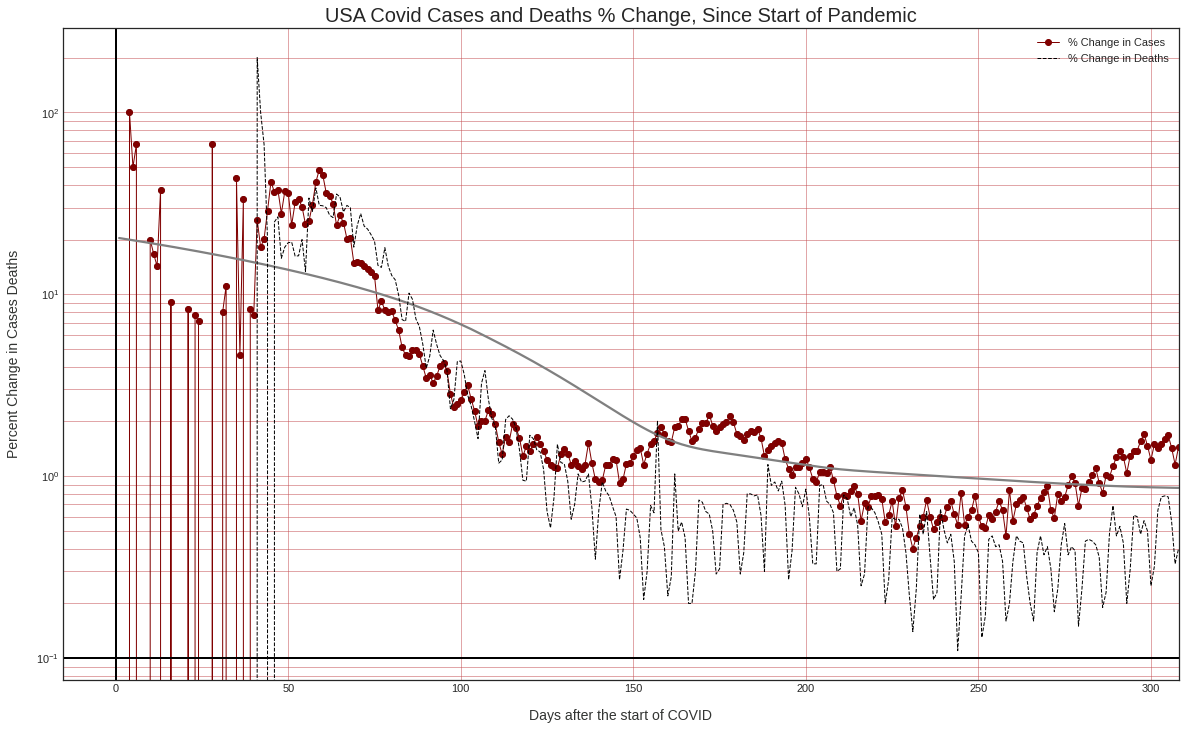

In [ ]:
#Date by Rate of Change
date = us_df['days_since_start']
pct_chg_cases = us_df['cases_pct_inc']
pct_chg_deaths = us_df['deaths_pct_inc']

fig, ax = plt.subplots(figsize = (20,12), sharex = True)

ax.plot(date, pct_chg_cases, '-o', color = 'maroon', linewidth = 1, label = '% Change in Cases')
sns.regplot(date, pct_chg_cases,  color = 'gray', lowess=True)

ax.plot(date, pct_chg_deaths, '--', color = 'black', linewidth = 1, label = '% Change in Deaths')
#sns.regplot(date, pct_chg_deaths, color = 'orange')

#Graphics Stuff
ax.set_title("USA Covid Cases and Deaths % Change, Since Start of Pandemic", fontsize = 20)
plt.yscale("log")
ax.legend()
ax.grid(which = 'both', color='r', linestyle='-', linewidth=.5)
ax.axhline(y=10**-1, color = "black",linewidth=2)
ax.axvline(x=0, color = "black",linewidth=2)
ax.set_xlabel("Days after the start of COVID", labelpad=15, fontsize=14, color="#333533");
ax.set_ylabel("Percent Change in Cases Deaths", labelpad=15, fontsize=14, color="#333533");

In [ ]:
#Save the new us csv as a file
us_df.to_csv("nyt_cleaned_us_covid.csv")